In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Data Cleaning

#### Importamos datos y echamos un vistazo 

In [2]:
shark = pd.read_csv("../data/attacks.csv",index_col=0, encoding = "iso-8859-1")
shark = pd.DataFrame(shark)

shark.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Limpiar nombres de columna porque tienen espacios en blanco

In [3]:
shark = shark.rename(columns=lambda x: x.strip())

In [4]:
shark.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Vemos Nulos 

#### Observamos que la mayoria de casillas son nulas. Solo hay unas 6.000 filas con datos.

In [5]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25723 entries, 2018.06.25 to xx
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6302 non-null   object 
 1   Year                    6300 non-null   float64
 2   Type                    6298 non-null   object 
 3   Country                 6252 non-null   object 
 4   Area                    5847 non-null   object 
 5   Location                5762 non-null   object 
 6   Activity                5758 non-null   object 
 7   Name                    6092 non-null   object 
 8   Sex                     5737 non-null   object 
 9   Age                     3471 non-null   object 
 10  Injury                  6274 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2948 non-null   object 
 13  Species                 3464 non-null   object 
 14  Investigator or Source  6285 non-null

In [6]:
shark.isnull().sum()   

Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

### Reset del indice porque Case Number es ahora mismo el indice


In [7]:
shark = shark.reset_index()

#shark.head()

### Eliminamos columnas que no vamos a utilizar.

In [8]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

##### Compruebo si la columna 'Case Number.1' y 'Case Number.2' comparten datos con 'Case Number'

###### Son identicas excepto unos pocos valor, por lo que las elimino. 

In [9]:
"""
shark['Case Number'].isin(shark['Case Number.1']).value_counts()
shark['Case Number.1'].isin(shark['Case Number.2']).value_counts()
"""

"\nshark['Case Number'].isin(shark['Case Number.1']).value_counts()\nshark['Case Number.1'].isin(shark['Case Number.2']).value_counts()\n"

#### Me quedo con las siguientes columnas, que son las necesarias para demostras la hipotesis

In [10]:
shark = shark[["Case Number", "Date", "Year", "Country", "Activity", "Sex", "Fatal (Y/N)"]]

In [11]:
shark.head()

,Case Number,Date,Year,Country,Activity,Sex,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,USA,Paddling,F,N
1,2018.06.18,18-Jun-2018,2018.0,USA,Standing,F,N
2,2018.06.09,09-Jun-2018,2018.0,USA,Surfing,M,N
3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,Surfing,M,N
4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Free diving,M,N


#### Observamos que los nulos siguen siendo la mayoria, elimino aquellas filas que todos sus valor son NULL

In [12]:
shark.isnull().sum()  

Case Number    17021
Date           19421
Year           19423
Country        19471
Activity       19965
Sex            19986
Fatal (Y/N)    19960
dtype: int64

In [13]:
shark = shark.dropna(how = 'all')

In [14]:
shark.isnull().sum()

Case Number       1
Date           2401
Year           2403
Country        2451
Activity       2945
Sex            2966
Fatal (Y/N)    2940
dtype: int64

In [15]:
shark.sample(10)

,Case Number,Date,Year,Country,Activity,Sex,Fatal (Y/N)
5949,1864.01.02,02-Jan-1864,1864.0,NEW ZEALAND,Standing / Bathing,M,N
1973,2001.03.00,Mar-2001,2001.0,CARIBBEAN SEA,Sinking of the 40' Esperanza off St. Maartin w...,NaN,Y
3752,1963.04.22,22-Apr-1963,1963.0,AUSTRALIA,Fishing,M,N
3002,1981.11.30,30-Nov-1981,1981.0,REUNION,Spearfishing,M,N
1916,2001.08.22,22-Aug-2001,2001.0,USA,Surfing,M,N
1287,2008.02.24,24-Feb-2008,2008.0,BAHAMAS,Diving,M,Y
5479,1906.04.14,14-Apr-1906,1906.0,AUSTRALIA,Diving for beche-de-mer,M,Y
2858,1985.02.18,18-Feb-1985,1985.0,USA,Scuba Diving for lobster (at surface),M,N
1927,2001.08.04,04-Aug-2001,2001.0,BAHAMAS,Swimming,M,N
892,2011.07.25,25-Jul-2011,2011.0,USA,Wade Fishing,M,N


#### Vemos que hay filas que aun son NA excepto por el valor "0" de la columna Case Number.  Pasamos a eliminar esas filas

In [16]:
shark.drop(shark[shark.Date.isnull()].index, inplace = True)

In [17]:
shark.isnull().sum()

Case Number      1
Date             0
Year             2
Country         50
Activity       544
Sex            565
Fatal (Y/N)    539
dtype: int64

### Creamos nueva columna Year obteniendo los datos de Case number

In [18]:
shark['Year1']= shark['Case Number'].apply(lambda x : str(x).split(".")[0])

In [19]:
shark.Year1.unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1962,08', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1954', '1953', '1952', '1951', '1851', '1950', '1949',
       '1948', '1947', '1946', '1945', '1944', '1943', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1924', '1923', '1922', '1921', '1920', '1919', '1900', '1918',
       '1917', '1916', '1915', '1914', '1913', '1912', '1911', '1910',
   

In [20]:

shark.Year1 = shark.Year1.str.replace(r'.*ND.*' , "NA")
shark.Year1 = shark.Year1.str.replace(r'.*nan.*' , "NA")
shark.Year1 = shark.Year1.str.replace(r'.*NA.*' , "NA")

In [21]:
shark.Year1.unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1962,08', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1954', '1953', '1952', '1951', '1851', '1950', '1949',
       '1948', '1947', '1946', '1945', '1944', '1943', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1924', '1923', '1922', '1921', '1920', '1919', '1900', '1918',
       '1917', '1916', '1915', '1914', '1913', '1912', '1911', '1910',
   

In [22]:
shark.head()

,Case Number,Date,Year,Country,Activity,Sex,Fatal (Y/N),Year1
0,2018.06.25,25-Jun-2018,2018.0,USA,Paddling,F,N,2018
1,2018.06.18,18-Jun-2018,2018.0,USA,Standing,F,N,2018
2,2018.06.09,09-Jun-2018,2018.0,USA,Surfing,M,N,2018
3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,Surfing,M,N,2018
4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Free diving,M,N,2018


In [23]:
del shark['Year']

In [24]:
shark.rename(columns = {'Fatal (Y/N)': "Fatal"}, inplace = True)
shark.rename(columns = {'Year1': "Year"}, inplace = True)


In [25]:
shark = shark[[ "Year","Country", "Activity", "Sex", "Fatal"]]
shark.head()

,Year,Country,Activity,Sex,Fatal
0,2018,USA,Paddling,F,N
1,2018,USA,Standing,F,N
2,2018,USA,Surfing,M,N
3,2018,AUSTRALIA,Surfing,M,N
4,2018,MEXICO,Free diving,M,N


<AxesSubplot:>

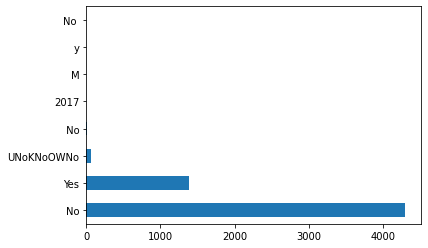

In [26]:

#shark["dead"]=shark[shark["Fatal"].isin(["Y","N"])]["Fatal"]

shark["dead"]=shark["Fatal"].str.replace("N","No").str.replace("Y","Yes").dropna().astype(str)

shark.dead.value_counts().plot(kind="barh")

In [27]:
shark["dead"]=shark["dead"].str.replace("No ","No").str.replace("M","NA").str.replace("y","Yes").str.replace("2017","NA").str.replace(" No","No").str.replace("UNoKNoOWNo","NA")

<AxesSubplot:>

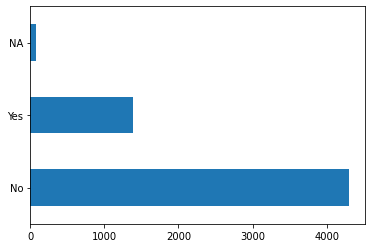

In [28]:
shark.dead.value_counts().plot(kind="barh")

### Limpiar paises

In [29]:
shark["Country"]=shark["Country"].apply(lambda x: str(x).lower())

In [30]:
shark.Country.value_counts()

usa                     2229
australia               1338
south africa             579
papua new guinea         134
new zealand              128
                        ... 
mexico                     1
netherlands antilles       1
admiralty islands          1
bay of bengal              1
western samoa              1
Name: Country, Length: 210, dtype: int64

In [31]:
sharkusa = shark[(shark["Country"]=="usa")]
sharkaustralia = shark[(shark["Country"]=="australia")]
sharksouthafrica  = shark[(shark["Country"]=="south africa")]
sharkpapua = shark[(shark["Country"]=="papua new guinea")]
sharknewze = shark[(shark["Country"]=="new zealand")]

In [32]:
sharkfinal = pd.concat([sharkusa, sharkaustralia,sharksouthafrica,sharkpapua,sharknewze])

<AxesSubplot:>

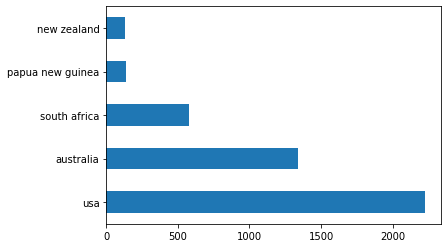

In [33]:
sharkfinal.Country.value_counts().plot(kind="barh")

### Limpiar Sex

<AxesSubplot:>

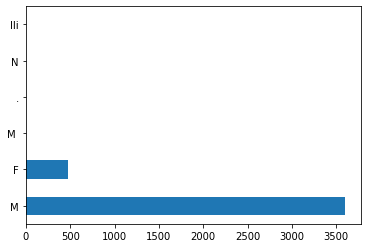

In [34]:
sharkfinal.Sex.value_counts().plot(kind="barh")

In [35]:
sharkfinal.Sex = sharkfinal.Sex.str.replace("N", "Unknown")
sharkfinal.Sex = sharkfinal.Sex.str.replace("lli", "Unknown")
sharkfinal.Sex = sharkfinal.Sex.str.replace("M ", "M")
sharkfinal.Sex = sharkfinal.Sex.str.replace(".", "Unknown")

<AxesSubplot:>

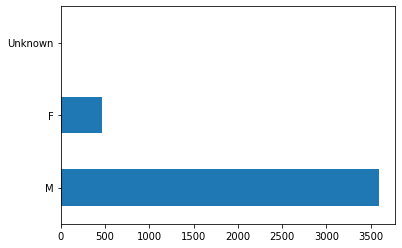

In [36]:
sharkfinal.Sex.value_counts().plot(kind="barh")

### Limpiar Activity

In [37]:
sharkfinal.Activity.value_counts()

Surfing                                 868
Swimming                                580
Fishing                                 301
Spearfishing                            204
Wading                                  129
                                       ... 
Filming                                   1
Searching for remains of  Dr. Marais      1
Steinhart Aquarium                        1
SUP Foil boarding                         1
Hauling in net                            1
Name: Activity, Length: 990, dtype: int64

In [38]:

sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*Swim.*' , "swimming")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*Fish.*' , "fishing")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*Wad.*' , "fishing")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*Bath.*' , "swimming")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*Surf.*' , "surf")

sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*surf.*' , "surf")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*swim.*' , "swimming")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*fish.*' , "fishing")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*wad.*' , "fishing")
sharkfinal.Activity = sharkfinal.Activity.str.replace(r'.*bath.*' , "swimming")

In [39]:
sharkfinal.Activity.value_counts()

surf                                               1110
fishing                                             937
swimming                                            850
Standing                                             85
Diving                                               66
                                                   ... 
Dived from dinghy to retrieve oar in heavy seas       1
Playing on a sandbar                                  1
Standing on sandbar                                   1
Standing on sandbank                                  1
Towing her sister on plastic ski board                1
Name: Activity, Length: 527, dtype: int64

In [40]:
sharksurf = sharkfinal[(sharkfinal["Activity"]=="surf")]
sharkfish = sharkfinal[(sharkfinal["Activity"]=="fishing")]
sharkswim  = sharkfinal[(sharkfinal["Activity"]=="swimming")]


sharkfinal = pd.concat([sharksurf, sharkfish, sharkswim])

In [41]:
sharkfinal.Activity.value_counts()

surf        1110
fishing      937
swimming     850
Name: Activity, dtype: int64

#### Convertir los NA en Unknown

In [42]:
sharkfinal.isnull().sum()

Year          0
Country       0
Activity      0
Sex         161
Fatal       194
dead        194
dtype: int64

In [43]:
sharkfinal['Sex'] = sharkfinal['Sex'].fillna("Unknown")
sharkfinal['Fatal'] = sharkfinal['Fatal'].fillna("Unknown")
sharkfinal['dead'] = sharkfinal['dead'].fillna("Unknown")


In [44]:
sharkfinal.isnull().sum()

Year        0
Country     0
Activity    0
Sex         0
Fatal       0
dead        0
dtype: int64

In [45]:
sharkfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 2 to 6022
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2897 non-null   object
 1   Country   2897 non-null   object
 2   Activity  2897 non-null   object
 3   Sex       2897 non-null   object
 4   Fatal     2897 non-null   object
 5   dead      2897 non-null   object
dtypes: object(6)
memory usage: 158.4+ KB


In [46]:
sharkfinal.head()

,Year,Country,Activity,Sex,Fatal,dead
2,2018,usa,surf,M,N,No
53,2017,usa,surf,F,N,No
54,2017,usa,surf,F,N,No
61,2017,usa,surf,F,N,No
69,2017,usa,surf,M,N,No


In [47]:
sharkfinal = sharkfinal.reset_index()

In [48]:
sharkfinal


,index,Year,Country,Activity,Sex,Fatal,dead
0,2,2018,usa,surf,M,N,No
1,53,2017,usa,surf,F,N,No
2,54,2017,usa,surf,F,N,No
3,61,2017,usa,surf,F,N,No
4,69,2017,usa,surf,M,N,No
...,...,...,...,...,...,...,...
2892,5963,1862,new zealand,swimming,M,N,No
2893,5977,1861,new zealand,swimming,M,N,No
2894,5983,1860,new zealand,swimming,M,N,No
2895,5984,1860,new zealand,swimming,M,Y,Yes


In [49]:
sharkfinal = sharkfinal[[ "Year","Country", "Activity", "Sex", "dead"]]

In [50]:
sharkfinal

,Year,Country,Activity,Sex,dead
0,2018,usa,surf,M,No
1,2017,usa,surf,F,No
2,2017,usa,surf,F,No
3,2017,usa,surf,F,No
4,2017,usa,surf,M,No
...,...,...,...,...,...
2892,1862,new zealand,swimming,M,No
2893,1861,new zealand,swimming,M,No
2894,1860,new zealand,swimming,M,No
2895,1860,new zealand,swimming,M,Yes


In [51]:
sharkfinal.to_csv("../data/sharkfinallimpio.csv")